In [17]:
import cv2
import numpy as np


import sys
import os
def create_dataset_with_adjust_brightness(brightness=0, base="NEU-DET"):
    # mkdir
    name = f"{base}_Sharpening_{brightness}"
    path = os.path.join('/Data4/student_zhihan_data/data', name)
    if not os.path.exists(path):
        os.mkdir(path)
        # create train, val, test directory
        os.mkdir(os.path.join(path, 'train'))
        os.mkdir(os.path.join(path, 'valid'))
        os.mkdir(os.path.join(path, 'test'))
        # copy images
        os.system(f"cp -r /Data4/student_zhihan_data/data/{base}/train/* {path}/train")
        os.system(f"cp -r /Data4/student_zhihan_data/data/{base}/valid/* {path}/valid")
        os.system(f"cp -r /Data4/student_zhihan_data/data/{base}/test/* {path}/test")
        # copy configure file
        os.system(f"cp /Data4/student_zhihan_data/data/{base}/data.yaml {path}")

    # adjust brightness of images in train, val, test directory
    for dir in ['train', 'valid', 'test']:
        for img in os.listdir(os.path.join(path, dir, "images")):
            img_path = os.path.join(path, dir, "images", img)
            img = cv2.imread(img_path)
            kernel = np.array([[0, 0, 0], [0, brightness, 0], [0, 0, 0]])
            img = cv2.filter2D(img, -1, kernel)
            cv2.imwrite(img_path, img)


create_dataset_with_adjust_brightness(brightness=3, base="GC10-DET")

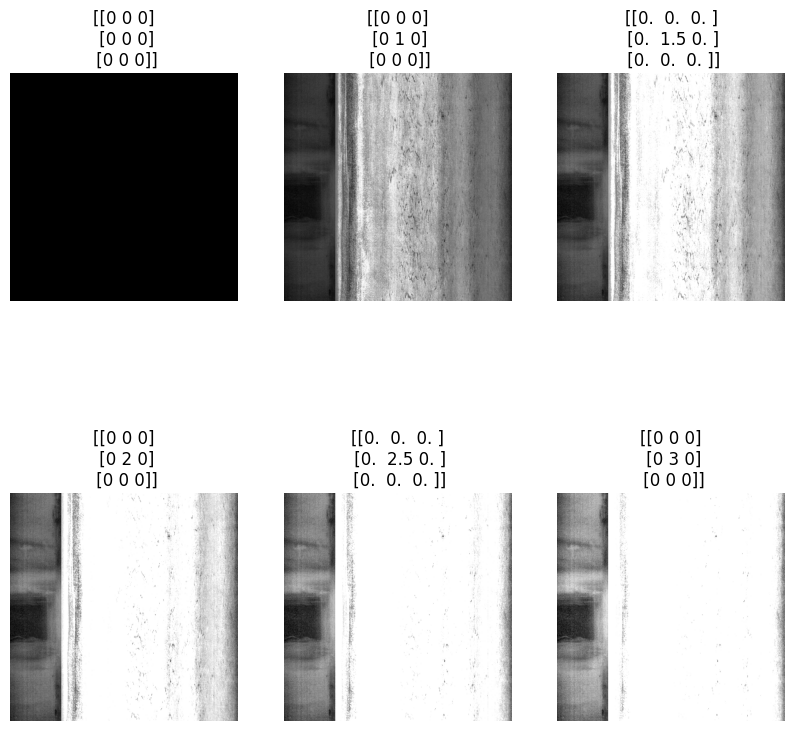

In [15]:
from matplotlib import pyplot as plt
img = cv2.imread('/Data4/student_zhihan_data/data/GC10-DET/test/images/img_01_425005700_00197_jpg.rf.88277838f2a5680138fe9a9bbe00d2a9.jpg')
figs, axies = plt.subplots(2,3, figsize=(10, 10))
ax = axies.flatten()
kernels = [
    [[0, 0, 0], [0, 0.5, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 1, 0], [0, 0, 0]],
            [[0, 0, 0], [0, 1.5, 0], [0, 0, 0]],
                [[0, 0, 0], [0, 2, 0], [0, 0, 0]],
                    [[0, 0, 0], [0, 2.5, 0], [0, 0, 0]],
                        [[0, 0, 0], [0, 3, 0], [0, 0, 0]],
    # [[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]],
    # [[-1, -1, -1], [-1, 5, -1], [-1, -1, -1]],
    # [[1, -2, 1], [-2, 9, -2], [1, -2, 1]],
    # [[1, -1, 1], [-1, 10, -1], [1, -1, 1]],
    # [[0, -1, 0], [-1, 12, -1], [0, -1, 0]]            
    ]
for idx, id in enumerate(range(0, 6)):
    kernel1 = np.array(kernels[id])
    ax[idx].imshow(cv2.filter2D(img, -1, kernel1))
    ax[idx].axis('off')
    ax[idx].set_title(f'{kernel1}')
plt.show()